<a href="https://colab.research.google.com/github/Oluwafunso56/2022-GTB-OPERATING-SEGMENT/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
import pandas as pd


data = pd.read_excel('/content/drive/MyDrive/Dataset/Assessment Dataset.xlsx')


In [ ]:
data.head()


,Customer ID,Recipient,Amount,Tranx_Date,Tranx ID,Updated Time,Buying Price,Transaction Gateway,Seller Name,Vending Channel,Account Type,Location,product,Status
0,8304555449023,0807643XXXX,1650.0,2024-11-24 08:34:03,7222324112408349006592,2024-11-24 08:34:03,1615.0,GTW-3,CS1,Direct,postpaid,UK,data,Successful
1,8304555449023,0808341XXXX,1150.0,2024-11-24 13:37:55,7232124112413371719392,2024-11-24 13:37:56,1132.5,GTW-3,CS1,Direct,postpaid,UK,airtime,Successful
2,8304555449023,0703388XXXX,850.0,2024-11-24 09:02:44,7232424112409020587992,2024-11-24 09:02:45,843.0,GTW-2,CS2,Direct,postpaid,UK,airtime,Successful
3,8304555449023,0806770XXXX,750.0,2024-11-24 20:35:43,7222424112420356982192,2024-11-24 20:35:44,746.5,GTW-2,CS2,Direct,postpaid,UK,airtime,Successful
4,8304555449023,0802066XXXX,850.0,2024-11-24 08:31:21,7222124112408315785092,2024-11-24 08:31:22,843.0,GTW-3,CS1,Direct,postpaid,UK,airtime,Successful


In [ ]:
data.shape

(648246, 14)

In [ ]:
data['Tranx_Date'] = pd.to_datetime(data['Tranx_Date'])

In [ ]:
data['Updated Time'] = pd.to_datetime(data['Updated Time'])


In [ ]:
print("Dataset Loaded:")

Dataset Loaded:


In [ ]:
print(data.head())

     Customer ID    Recipient  Amount          Tranx_Date  \
0  8304555449023  0807643XXXX  1650.0 2024-11-24 08:34:03   
1  8304555449023  0808341XXXX  1150.0 2024-11-24 13:37:55   
2  8304555449023  0703388XXXX   850.0 2024-11-24 09:02:44   
3  8304555449023  0806770XXXX   750.0 2024-11-24 20:35:43   
4  8304555449023  0802066XXXX   850.0 2024-11-24 08:31:21   

                 Tranx ID        Updated Time  Buying Price  \
0  7222324112408349006592 2024-11-24 08:34:03        1615.0   
1  7232124112413371719392 2024-11-24 13:37:56        1132.5   
2  7232424112409020587992 2024-11-24 09:02:45         843.0   
3  7222424112420356982192 2024-11-24 20:35:44         746.5   
4  7222124112408315785092 2024-11-24 08:31:22         843.0   

  Transaction Gateway Seller Name Vending Channel Account Type Location  \
0               GTW-3         CS1          Direct     postpaid       UK   
1               GTW-3         CS1          Direct     postpaid       UK   
2               GTW-2        

In [ ]:
# 1. Successful and Failed Transaction Counts
successful_transactions = data[data['Status'] == 'Successful']


In [ ]:
failed_transactions = data[data['Status'] != 'Successful']


In [ ]:
successful_count = len(successful_transactions)


In [ ]:
failed_count = len(failed_transactions)


In [ ]:
print("\n1. Successful and Failed Transaction Counts:")
print(f"Successful Transactions: {successful_count}")
print(f"Failed Transactions: {failed_count}")



1. Successful and Failed Transaction Counts:
Successful Transactions: 643456
Failed Transactions: 4790


In [ ]:
# 2. Average Response Time (in seconds)
data['Response_Time'] = (data['Updated Time'] - data['Tranx_Date']).dt.total_seconds()
average_response_time = data['Response_Time'].mean()

In [ ]:
print("\n2. Average Response Time:")
print(f"Average Response Time: {average_response_time:.2f} seconds")



2. Average Response Time:
Average Response Time: 0.93 seconds


In [ ]:
# 3. Failure Rate per Product
failure_rate_per_product = failed_transactions.groupby('product')['Tranx ID'].count() / data.groupby('product')['Tranx ID'].count() * 100
failure_rate_per_product = failure_rate_per_product.fillna(0)

In [ ]:
print("\n3. Failure Rate per Product:")
print(failure_rate_per_product)


3. Failure Rate per Product:
product
Electricity    16.842105
airtime         0.401496
cabletv         2.941176
data            1.915151
electricity     0.000000
pin             7.909605
startimes       0.000000
Name: Tranx ID, dtype: float64


In [ ]:
# 4. Gross Profit Calculation
data['Gross_Profit'] = data['Amount'] - data['Buying Price']
gross_profit = data['Gross_Profit'].sum()

In [ ]:
print("\n4. Gross Profit:")
print(f"Total Gross Profit: {gross_profit:.2f}")


4. Gross Profit:
Total Gross Profit: 14250030.70


In [ ]:
# Summary of KPIs
print("\nSummary of KPIs:")
print(f"Successful Transactions: {successful_count}")
print(f"Failed Transactions: {failed_count}")
print(f"Average Response Time: {average_response_time:.2f} seconds")
print(f"Total Gross Profit: {gross_profit:.2f}")
print("\nFailure Rate per Product:")
print(failure_rate_per_product)


Summary of KPIs:
Successful Transactions: 643456
Failed Transactions: 4790
Average Response Time: 0.93 seconds
Total Gross Profit: 14250030.70

Failure Rate per Product:
product
Electricity    16.842105
airtime         0.401496
cabletv         2.941176
data            1.915151
electricity     0.000000
pin             7.909605
startimes       0.000000
Name: Tranx ID, dtype: float64


In [ ]:
# Question 3: Create daily trend chart for the top 5 customers
# Top 5 customers by transaction count
top_5_customers = data['Customer ID'].value_counts().head(5).index
top_5_data = data[data['Customer ID'].isin(top_5_customers)]

In [ ]:
# Group data by day and Customer ID
daily_trend = top_5_data.groupby([top_5_data['Tranx_Date'].dt.date, 'Customer ID']).size().reset_index(name='Count')


In [ ]:
import matplotlib.pyplot as plt

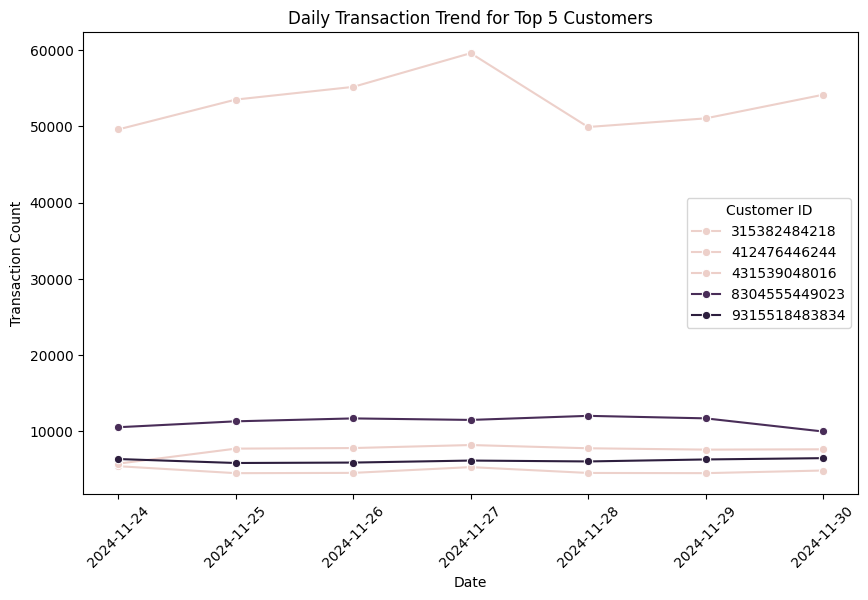

In [ ]:
# Plot the daily trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_trend, x='Tranx_Date', y='Count', hue='Customer ID', marker='o')
plt.title("Daily Transaction Trend for Top 5 Customers")
plt.xlabel("Date")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.legend(title='Customer ID')
plt.show()

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
# Question 4: Identify top 10 least performing customers per product
# Group by Customer ID and product, count transactions
customer_product_performance = data.groupby(['Customer ID', 'product']).size().reset_index(name='Transaction_Count')


In [ ]:
# Sort and get bottom 10 customers per product
least_performers = customer_product_performance.sort_values(by='Transaction_Count').groupby('product').head(10)
print("\nTop 10 Least Performing Customers per Product:")
print(least_performers)


Top 10 Least Performing Customers per Product:
        Customer ID      product  Transaction_Count
102  93733698412253         data                  1
21     416404425437         data                  1
20     416404425437      airtime                  1
60    5315668420288          pin                  1
40    1733499421416      airtime                  1
25     431539048016  electricity                  1
78    8304555449023          pin                  1
52    3733625420153      airtime                  1
87   33733665459469  Electricity                  1
30     638422451183      airtime                  1
59    4732579472580         data                  1
89   33733665459469         data                  1
94   53733683488385      airtime                  1
95   53733683488385      cabletv                  1
5      151172469278      airtime                  1
45    2711999437214      cabletv                  1
99   91315804436914          pin                  1
42    2326019439

In [ ]:
# Add a Gross Profit column
data['Gross_Profit'] = data['Amount'] - data['Buying Price']

In [ ]:
summary = data.groupby('Customer ID').agg(
    Successful_Facevalue=('Amount', lambda x: x[data['Status'] == 'Successful'].sum()),  # Sum of amounts for successful transactions
    Failed_FaceValue=('Amount', lambda x: x[data['Status'] != 'Successful'].sum()),  # Sum of amounts for failed transactions
    Estimated_Gross_Profit=('Gross_Profit', 'sum'),  # Total Gross Profit
    Successful_Count=('Status', lambda x: (x == 'Successful').sum()),  # Count of successful transactions
    Failure_Rate=('Status', lambda x: (x != 'Successful').mean())  # Failure rate as the proportion of failed transactions
).reset_index()

In [ ]:
# Display the summary table
print("Summary Table:")
print(summary)

Summary Table:
       Customer ID  Successful_Facevalue  Failed_FaceValue  \
0      16414468728          9.750000e+03              0.00   
1     138455421218          4.109796e+07         898585.00   
2     151172469278          1.245000e+04              0.00   
3     312645843913          1.122456e+07         293150.00   
4     315382484218          3.829516e+07         567280.00   
5     315468429624          4.945871e+06          21600.00   
6     373351941589          5.825000e+04              0.00   
7     412476446244          4.340243e+08        2091840.35   
8     416404425437          7.300000e+03              0.00   
9     431539048016          4.998328e+07         916919.00   
10    615674487699          1.557100e+05           5950.00   
11    638422451183          9.500000e+02              0.00   
12    917000447287          7.000000e+02           1450.00   
13    938425413558          2.900000e+03              0.00   
14   1284897443076          9.066669e+06          69716

In [ ]:
# Add failure rate columns with default dummy values (0.0)
summary['MTN Failure Rate'] = 0.0
summary['Airtel Failure Rate'] = 0.0
summary['Glo Failure Rate'] = 0.0
summary['9Mobile failure Rate'] = 0.0
summary['CableTV Failure Rate'] = 0.0
summary['Electricity Failure Rate'] = 0.0

In [ ]:
# Display the updated summary table
print("Updated Summary Table with Failure Rate Columns:")
print(summary)

Updated Summary Table with Failure Rate Columns:
       Customer ID  Successful_Facevalue  Failed_FaceValue  \
0      16414468728          9.750000e+03              0.00   
1     138455421218          4.109796e+07         898585.00   
2     151172469278          1.245000e+04              0.00   
3     312645843913          1.122456e+07         293150.00   
4     315382484218          3.829516e+07         567280.00   
5     315468429624          4.945871e+06          21600.00   
6     373351941589          5.825000e+04              0.00   
7     412476446244          4.340243e+08        2091840.35   
8     416404425437          7.300000e+03              0.00   
9     431539048016          4.998328e+07         916919.00   
10    615674487699          1.557100e+05           5950.00   
11    638422451183          9.500000e+02              0.00   
12    917000447287          7.000000e+02           1450.00   
13    938425413558          2.900000e+03              0.00   
14   1284897443076   